In [95]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

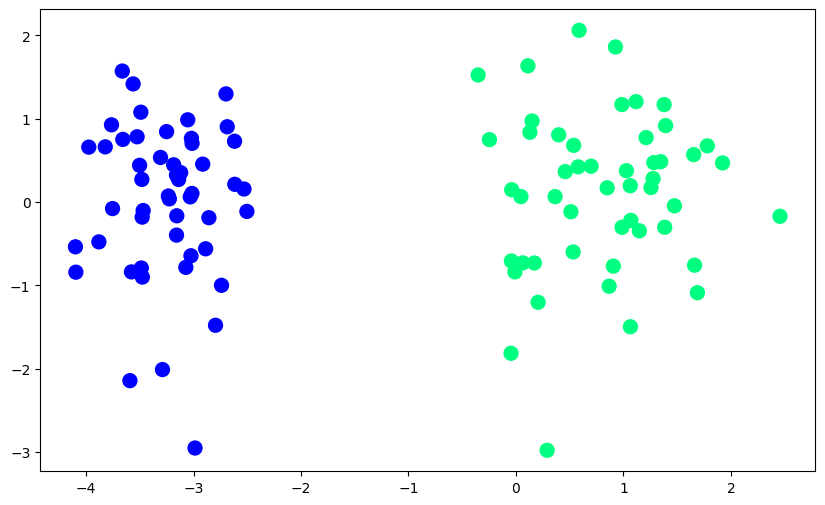

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [97]:
lr = LogisticRegression(solver='sag')


In [98]:
lr.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [99]:
print(lr.coef_)
print(lr.intercept_)

[[2.36777296 0.02166621]]
[3.13935165]


In [100]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])

In [101]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [102]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [103]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [104]:
coef_,intercept = gd(X,y)

In [105]:
m = -(coef_[0]/coef_[1])
b = -(intercept/coef_[1])

In [106]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

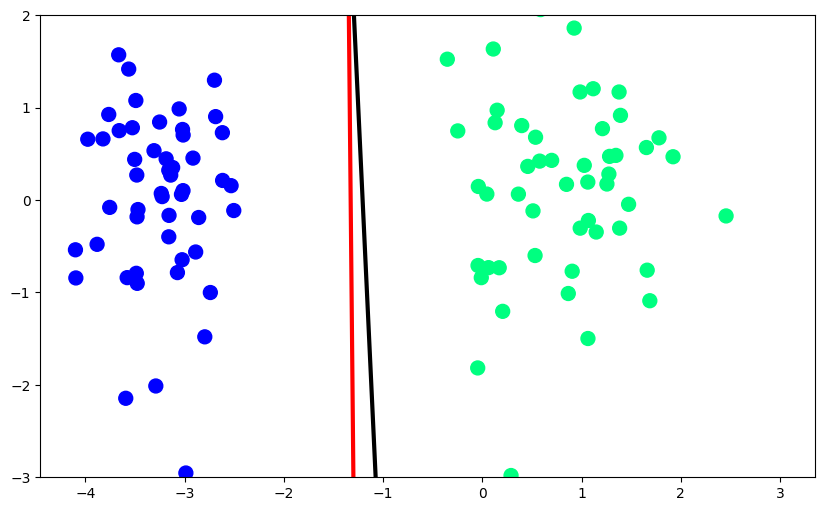

In [107]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)